In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

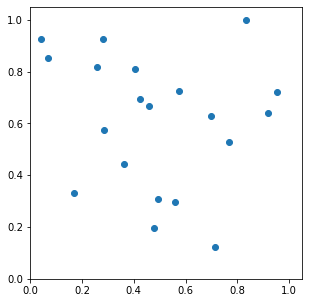

In [4]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, aspect=1)

np.random.seed(970725)

x = np.random.rand(20)
y = np.random.rand(20)

ax.scatter(x, y)
ax.set_xlim(0, 1.05)
ax.set_ylim(0, 1.05)

plt.show()

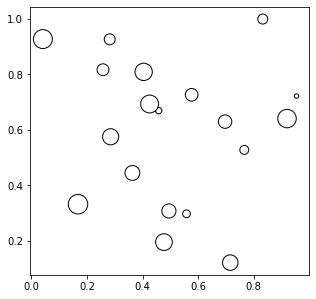

In [8]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, aspect=1)

np.random.seed(970725)

x = np.random.rand(20)
y = np.random.rand(20)
s = np.arange(20) * 20

ax.scatter(x, y, 
           s= s,    # 사이즈 지정
           c='white',   # 색 지정
           marker='o',  # 마커 지정
           linewidth=1, # 테두리 두께
           edgecolor='black')  # 테두리 색

plt.show()

## 실습용 데이터셋
- iris 데이터셋

In [12]:
iris = pd.read_csv('../../../data/iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


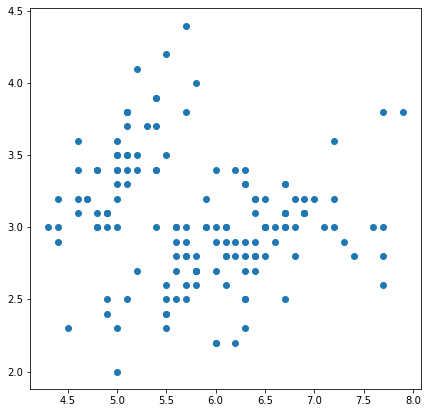

In [13]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

ax.scatter(x=iris['SepalLengthCm'], y=iris['SepalWidthCm'])

plt.show()

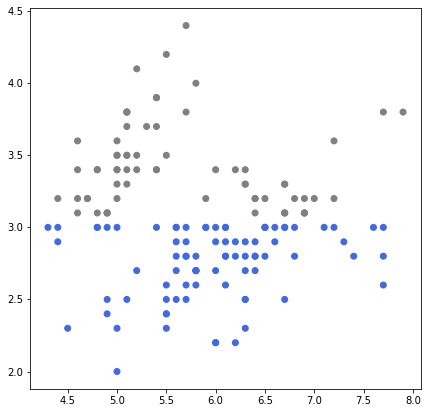

In [14]:
# SepalWidthCm의 평균치 구하고
# 평균보다 작으면 파란색, 평균보다 크면 회색
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

slc_mean = iris['SepalLengthCm'].mean()
swc_mean = iris['SepalWidthCm'].mean()

ax.scatter(x=iris['SepalLengthCm'], 
           y=iris['SepalWidthCm'],
           c=['royalblue' if yy <= swc_mean else 'gray' for yy in iris['SepalWidthCm']]
          )

plt.show()

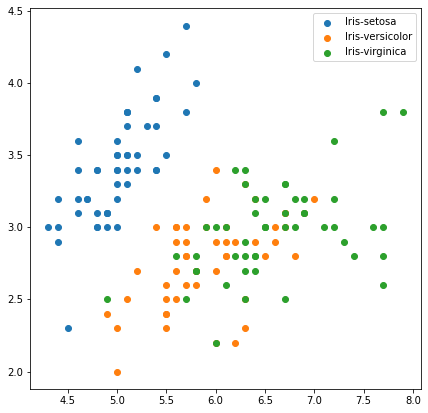

In [16]:
# 아예 꽃의 종류를 기준으로 색 지정
# legend로 범례 지정이 가능
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for species in iris['Species'].unique():
    # 부분 집합(3종류) 추출
    iris_sub = iris[iris['Species']==species]
    ax.scatter(x=iris_sub['SepalLengthCm'], 
               y=iris_sub['SepalWidthCm'], 
               label=species)

ax.legend()    
plt.show()

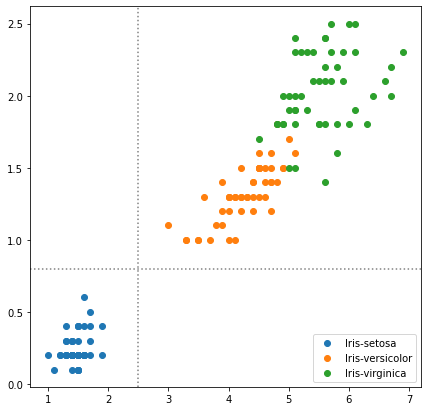

In [18]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for species in iris['Species'].unique():
    iris_sub = iris[iris['Species']==species]
    ax.scatter(x=iris_sub['PetalLengthCm'], 
               y=iris_sub['PetalWidthCm'], 
               label=species)

# 선을 추가해서 시각적인 주의를 줄 수 있음
ax.axvline(2.5, color='gray', linestyle=':')    
ax.axhline(0.8, color='gray', linestyle=':')    
ax.legend()    
plt.show()

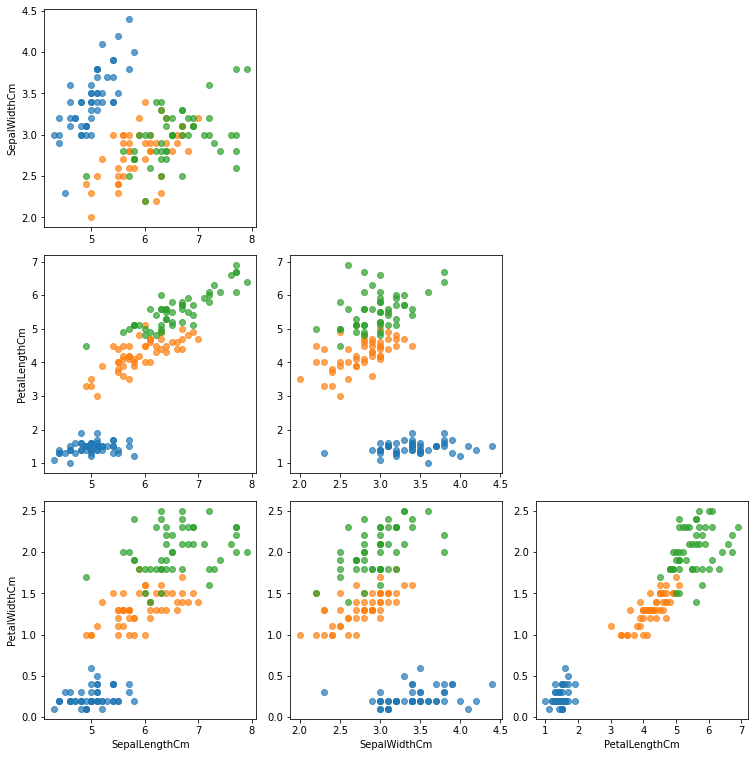

In [19]:
fig, axes = plt.subplots(4, 4, figsize=(14, 14))

feat = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for i, f1 in enumerate(feat):
    for j, f2 in enumerate(feat):
        
        # 안 보는 것들은 subplot을 꺼버림
        if i <= j : 
            axes[i][j].set_visible(False)
            continue
            
        for species in iris['Species'].unique():
            iris_sub = iris[iris['Species']==species]
            axes[i][j].scatter(x=iris_sub[f2], 
                               y=iris_sub[f1], 
                               label=species, 
                               alpha=0.7)
        if i == 3: axes[i][j].set_xlabel(f2)
        if j == 0: axes[i][j].set_ylabel(f1)

plt.tight_layout()        
plt.show()

- 위의 방법은 seaborn의 pairplot에서 구현이 쉽게 가능